# Text Processing for Text Classification  &  Sentiment Analysis
- processing text before vectorization with Tf-Idf and CountVectorizer

##  Required packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import itertools

import re
import emoji
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer



## Load data

In [2]:
# load the data
data = pd.read_csv("redoute_v3.csv")

# Now we are interested only on comments and ratings
df = data[["comment", "rating"]]

# check nan values
print(df.isna().sum())

print(df.info())

comment    0
rating     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23469 entries, 0 to 23468
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  23469 non-null  object
 1   rating   23469 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 366.8+ KB
None


## Prepare the data - Text processing
The objective is to clean the comments text, that is:
- remove special characters
- remove numbers
- remove punctuations
- remove stop words (word with no meaningful information e.g. 'le', 'la', 'les' etc.French stops woard sinces we are dealing with customers reviews in french.
- lemmatize words (text pre-processing technique that reduces a word to its <b>root meaning</b> to identify similarities)
- stemming (In linguistic morphology and information retrieval, stemming is the process of reducing inflected words to their <b>word stem, base or root form</b>—generally a written word form. cf. Wikipedia)

### Clean the dataset

In [3]:
# Define stop words
stopwords_to_add = ["être", "leur", "leurs", "avoir", "cela", "les", "de", "pour", "des", "cette", "a",
                   "j'ai", "car", "c'est", "chez", "tout", "fait", "chez", "donc", 
                   "n'est", "si", "alors", "n'ai", "faire", "deux", "comme", "jour", "tr", "si", "ue"]

stop_words = set(stopwords.words('french'))  | set(stopwords_to_add)

In [4]:
# Function to clean comments text
# cf. https://github.com/priya-dwivedi/Deep-Learning/tree/master/text_classification_with_BERT
def clean_dataset(text):
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove URL, RT, mention(@)
    text=  re.sub(r'http(\S)+', '',text)
    text=  re.sub(r'http ...', '',text)
    text=  re.sub(r'(RT|rt)[ ]*@[ ]*[\S]+','',text)
    text=  re.sub(r'RT[ ]?@','',text)
    text = re.sub(r'@[\S]+','',text)
    # Remove words with 3 or fewer letters
    text = re.sub(r'\b\w{1,3}\b', ' ', text)
    #&, < and >
    text = re.sub(r'&amp;?', 'and',text)
    text = re.sub(r'&lt;','<',text)
    text = re.sub(r'&gt;','>',text)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove emoji
    text = emoji.demojize(text)
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]',' ', text)
    #2. Tokenize
    text_tokens = word_tokenize(text.lower(), language='french') 
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #joining
    text =  " ".join(tokens_without_sw)
    return text

In [5]:
# Clean the comments 
df["comment_cleaned"] = df["comment"].apply(clean_dataset)

In [6]:
#contrôle
w = df["comment"]
z = df["comment_cleaned"]
for i in range(5):
    print(str(i)+"*** --------------")
    print(z[i])
    print("--original text-----")
    print(w[i])

0*** --------------
facilte sollicitations dosées qualité pourrait cependant améliorer volet recap commandes appli moment livraison lorsque propres équipes intervenants autres communiquent rappel systématique contenu commande numéro redoute sociétés livraison code bien quand commande beaucoup modes livraison différents manière rythmes sportif ailleurs bien sociétés livraison quand elles livrent alignent look mails autres type communication vôtre service parfait bout bout concernant marques autres vôtres distribuez chargent livrer annoncez parfois dates livraison correspondent général livré avant certes achetons vois devriez informés elles vraies dates livraison redoute reste transparent
--original text-----
Facilte, sollicitations dosées...qualité..on pourrait cependant améliorer le volet recap commandes sur l'appli avec au moment de la livraison, lorsque vos propres équipes ou des intervenants autres communiquent avec nous un rappel systématique du contenu de la commande et son numéro

### Lemmatize 

In [7]:
# Lemmatization with SPACY
nlp = spacy.load('fr_core_news_md')

def lemmatize_text(text):
    tokens = nlp(text)  
    text_lemmatized = ""
    for token in tokens:
        text_lemmatized =  text_lemmatized + token.lemma_ + " "
    return text_lemmatized


In [8]:
# Lemmatize text of comment cleaned
df["comment_lemmatized"] = df["comment_cleaned"].apply(lemmatize_text)

In [9]:
#contrôle
o = df["comment"]
w = df["comment_cleaned"]
z = df["comment_lemmatized"]

for i in range(5):
    print(str(i)+"lemm --------------")
    print(z[i])
    print("--cleaned text-----")
    print(w[i])
    print("--original text-----")
    print(o[i])

0lemm --------------
facilte sollicitation doser qualité pouvoir cependant améliorer volet recap commande appli moment livraison lorsque propre équipe intervenant autre communiquer rappel systématique contenu commande numéro redoute société livraison code bien quand commande beaucoup mode livraison différent manière rythme sportif ailleurs bien société livraison quand lui livrer aligner look mail autre type communication vôtre service parfait bout bout concerner marque autre vôtre distribuer charger livrer annoncer parfois date livraison correspondre général livrer avant certes acheter voir devoir informer lui vrai date livraison redoute reste transparent 
--cleaned text-----
facilte sollicitations dosées qualité pourrait cependant améliorer volet recap commandes appli moment livraison lorsque propres équipes intervenants autres communiquent rappel systématique contenu commande numéro redoute sociétés livraison code bien quand commande beaucoup modes livraison différents manière rythme

### Stemming

In [10]:
# function to to apply stemming
stemmer = SnowballStemmer(language='french')
def return_stem(texte):
    doc = nlp(texte)
    return' '.join([stemmer.stem(word.text) for word in doc])

In [11]:
# contrôle
text="facilte sollicitation doser qualité pouvoir cependant améliorer volet recap commande appli moment livraison lorsque propre équipe intervenant autre communiquer rappel systématique"

return_stem(text)

'facilt sollicit dos qualit pouvoir cepend amélior volet recap command appli moment livraison lorsqu propr équip interven autr communiqu rappel systémat'

In [12]:
# Apply stemming to comments lemmatized
df["comment_stem"] = df["comment_lemmatized"].apply(return_stem)

In [13]:
#contrôle
o = df["comment"]
w = df["comment_lemmatized"]
z = df["comment_stem"]

for i in range(5):
    print(str(i)+"-- stemm --------------")
    print(z[i])
    print("-- lemm -----")
    print(w[i])
   # print("-- original text ----")
    #print(o[i])

0-- stemm --------------
facilt sollicit dos qualit pouvoir cepend amélior volet recap command appli moment livraison lorsqu propr équip interven autr communiqu rappel systémat contenu command numéro redout societ livraison cod bien quand command beaucoup mod livraison différent mani rythm sportif ailleur bien societ livraison quand lui livr align look mail autr typ commun vôtr servic parf bout bout concern marqu autr vôtr distribu charg livr annonc parfois dat livraison correspondr général livr avant cert achet voir devoir inform lui vrai dat livraison redout rest transparent
-- lemm -----
facilte sollicitation doser qualité pouvoir cependant améliorer volet recap commande appli moment livraison lorsque propre équipe intervenant autre communiquer rappel systématique contenu commande numéro redoute société livraison code bien quand commande beaucoup mode livraison différent manière rythme sportif ailleurs bien société livraison quand lui livrer aligner look mail autre type communicatio

### CloudWords

In [14]:
# function to plot wordcloud of a given text
from wordcloud import WordCloud
from PIL import Image

def plot_word_cloud(text, title, background_color = "white"):
    # Définir un masque
    # mask_coloring = np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=500, 
                   stopwords=stop_words,  
                   max_font_size=90, random_state=42)
    # Générer et afficher le nuage de mots
    #plt.figure(figsize= (8,6))
    wc.generate(text)
    plt.title(title)
    plt.imshow(wc)
    plt.show()

def generate_word_cloud(text, background_color = "white"):
    # Définir un masque
    # mask_coloring = np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=500, 
                   stopwords=stop_words,  
                   max_font_size=90, random_state=42)
    # Générer et afficher le nuage de mots
    #plt.figure(figsize= (8,6))
    wc.generate(text)
    return wc
    

In [15]:
#Prepare the comments to be view as a wordCloud

# comments cleaned only
all_comments = ' '.join(df["comment_cleaned"])
pos_cmt = ' '.join(df[df["rating"]>=4]["comment_cleaned"])
neg_cmt = ' '.join(df[df["rating"]<=3]["comment_cleaned"])

#comments cleaned and lemmatized
all_comments_lem = ' '.join(df["comment_lemmatized"])
pos_cmt_lem = ' '.join(df[df["rating"]>=4]["comment_lemmatized"])
neg_cmt_lem = ' '.join(df[df["rating"]<=3]["comment_lemmatized"])

all_comments_stem = ' '.join(df["comment_stem"])
pos_cmt_stem = ' '.join(df[df["rating"]>=4]["comment_stem"])
neg_cmt_stem = ' '.join(df[df["rating"]<=3]["comment_stem"])

# list of text for the wordcloud 
all_cmt_list = [ (all_comments, all_comments_lem, "all_comments", "all_comments_lem", "white"),
                (pos_cmt, pos_cmt_lem, "pos_cmt", "pos_cmt_lem", "navy"),
                (neg_cmt, neg_cmt_lem, "neg_cmt", "neg_cmt_lem", "black")]

stem_vs_lem = [ (all_comments_stem, all_comments_lem, "all_comments_stem", "all_comments_lem", "white"),
                (pos_cmt_stem, pos_cmt_lem, "pos_cmt_sem", "pos_cmt_lem", "navy"),
                (neg_cmt_stem, neg_cmt_lem, "neg_cmt_stem", "neg_cmt_lem", "black")]


#### Wordcloud of comment_cleaned versus comment lemmatized

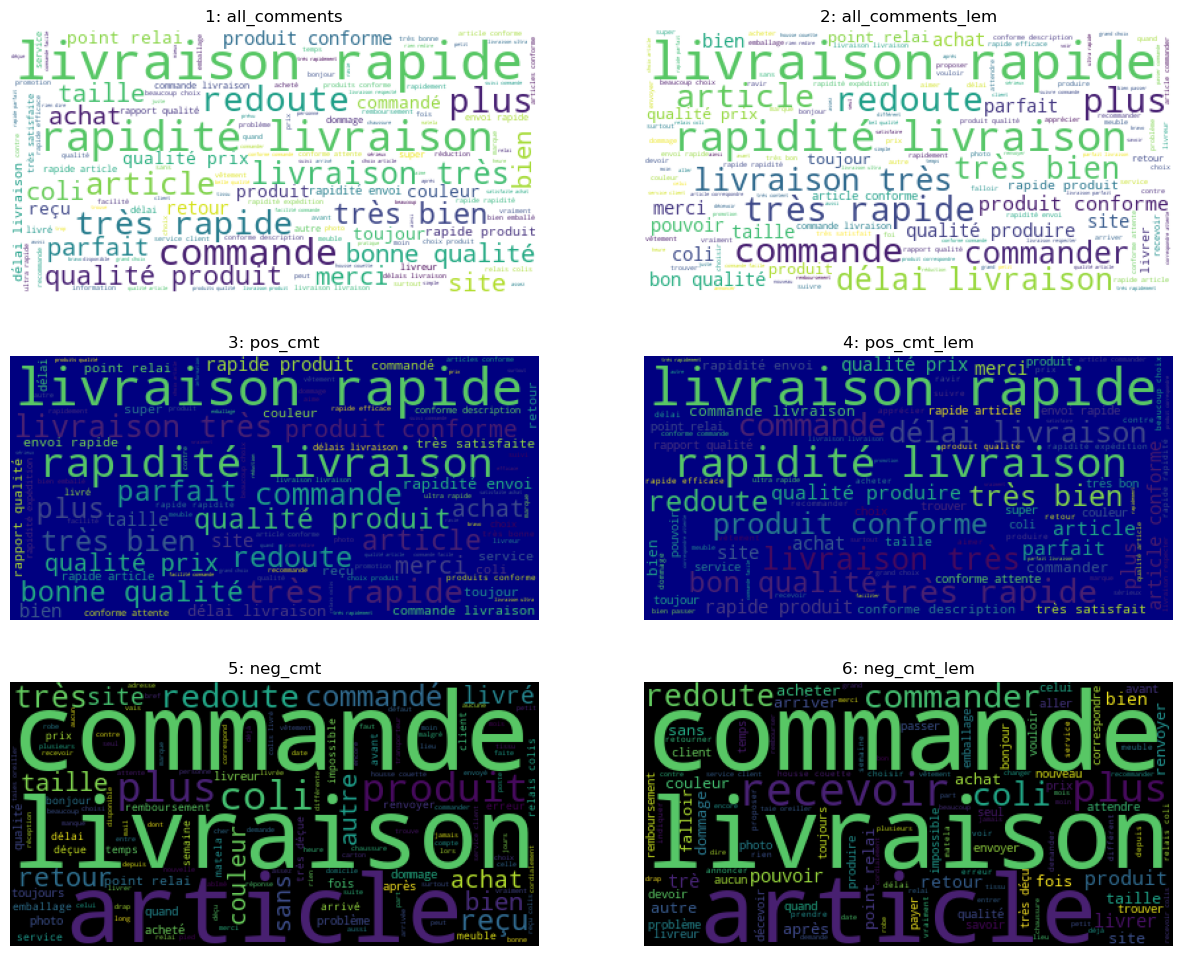

In [16]:
fig = plt.figure(figsize = (15, 12))
j = 1
bcolor = "white"
for cmt, cmt_lem, cmt_title, cmt_lem_title, bcolor in all_cmt_list:
    ax = fig.add_subplot(3,2,j)
    wc = generate_word_cloud(cmt, background_color = bcolor)
    ax.imshow(wc)
    plt.title(str(j) + ": " + cmt_title)
    ax.axis('off')

    ax = fig.add_subplot(3,2,j+1)
    wc = generate_word_cloud(cmt_lem, background_color = bcolor)
    ax.imshow(wc)
    plt.title(str(j+1) + ": " + cmt_lem_title)
    ax.axis('off')
    j = j+2

####  Wordcloud of comment_stem versus comment_lemmatized 

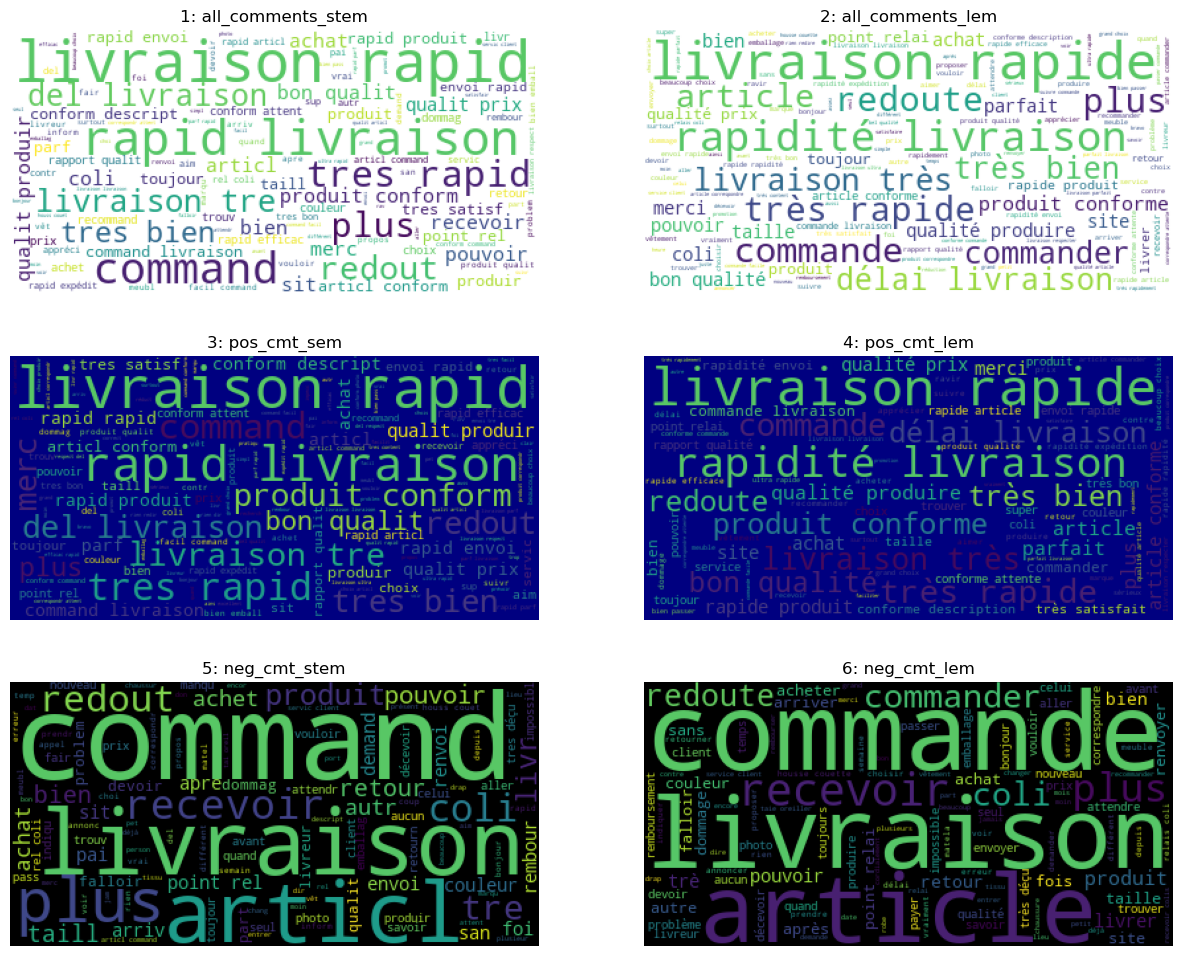

In [17]:
fig = plt.figure(figsize = (15, 12))
j = 1
bcolor = "white"
for cmt, cmt_lem, cmt_title, cmt_lem_title, bcolor in stem_vs_lem:
    ax = fig.add_subplot(3,2,j)
    wc = generate_word_cloud(cmt, background_color = bcolor)
    ax.imshow(wc)
    plt.title(str(j) + ": " + cmt_title)
    ax.axis('off')

    ax = fig.add_subplot(3,2,j+1)
    wc = generate_word_cloud(cmt_lem, background_color = bcolor)
    ax.imshow(wc)
    plt.title(str(j+1) + ": " + cmt_lem_title)
    ax.axis('off')
    j = j+2

###  Word distribution in the overall comments

In [18]:
# Further cleaning needed 
z = df["comment_stem"]
df["stem_len"] = df["comment_stem"].apply(lambda x: len(x))
df[(z=="rieb") | (z=="xxx" )| (z=="tuot") |(df["stem_len"]<=2)]

,comment,rating,comment_cleaned,comment_lemmatized,comment_stem,stem_len
2760,vous avez tout fait,5,,,,0
2950,Tout a été ok,5,,,,0
3047,\n.?\n\n?...,5,,,,0
3107,tout,5,,,,0
3111,Tout,5,,,,0
...,...,...,...,...,...,...
22123,👍,5,,,,0
22124,X,5,,,,0
22125,-,4,,,,0
22126,,4,,,,0


In [19]:
# Removes lines with comments_stem empty or too small e.g length <= 4
z = df["stem_len"]
print ("number of comment_stem wwith lenght <= 4: ", len(df[z<=4]))
# after analysis we have "rieb", "xxx", "tuot" in comment_stem to remove

number of comment_stem wwith lenght <= 4:  786


In [20]:
z = df["comment_stem"]
index_to_drop = df[(z=="rieb") | (z=="xxx" )| (z=="tuot") |(df["stem_len"]<=4)].index

df.drop(index_to_drop, inplace = True) 

print ("number of comment_stem with lenght <= 4: ", len(df[df["stem_len"]<=4]))


number of comment_stem with lenght <= 4:  0


In [21]:
# word frequency distribution
all_tokens = word_tokenize(all_comments_lem, language='french')
pos_tokens = word_tokenize(pos_cmt_lem, language='french')
neg_tokens = word_tokenize(neg_cmt_lem, language='french')

fd_all = nltk.FreqDist(all_tokens)
fd_pos = nltk.FreqDist(pos_tokens)
fd_neg = nltk.FreqDist(neg_tokens)

#### Top 20 most frequent words

In [22]:
print("top ten for all comments:")
print("------------------------")
print(fd_all.most_common(10))
print("------------------------")
print("top ten for positive comments:")
print(fd_pos.most_common(10))
print("------------------------")
print("top ten for negative comments:")
print(fd_neg.most_common(10))

top ten for all comments:
------------------------
[('livraison', 9411), ('rapide', 5802), ('très', 5370), ('commande', 4275), ('rapidité', 4021), ('qualité', 3725), ('article', 3516), ('produit', 3063), ('bien', 2537), ('conforme', 2347)]
------------------------
top ten for positive comments:
[('livraison', 8581), ('rapide', 5747), ('très', 4838), ('rapidité', 3995), ('commande', 3489), ('qualité', 3421), ('article', 2920), ('produit', 2734), ('conforme', 2269), ('bien', 2263)]
------------------------
top ten for negative comments:
[('livraison', 830), ('commande', 786), ('colis', 665), ('article', 596), ('recevoir', 577), ('plus', 550), ('commander', 534), ('très', 532), ('livrer', 364), ('redoute', 342)]


In [23]:
dfd_all = pd.DataFrame(fd_all.most_common(), columns=["token", "frequency"])
dfd_neg = pd.DataFrame(fd_neg.most_common(), columns=["token", "frequency"])
dfd_pos= pd.DataFrame(fd_pos.most_common(), columns=["token", "frequency"])
dfd_neg.head(10)

,token,frequency
0,livraison,830
1,commande,786
2,colis,665
3,article,596
4,recevoir,577
5,plus,550
6,commander,534
7,très,532
8,livrer,364
9,redoute,342


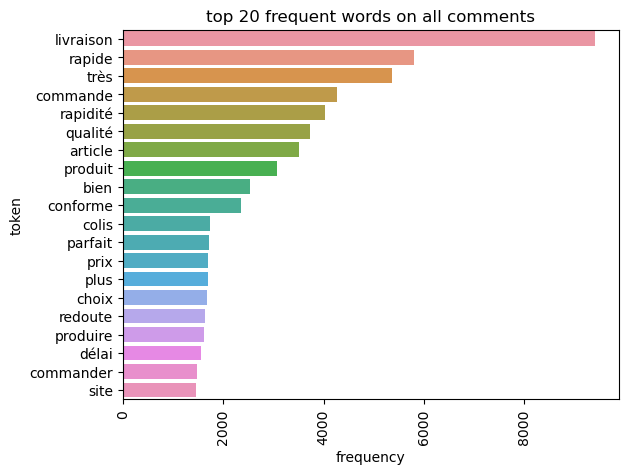

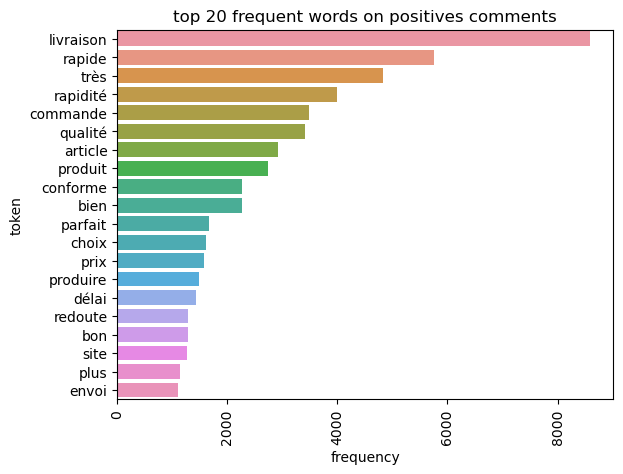

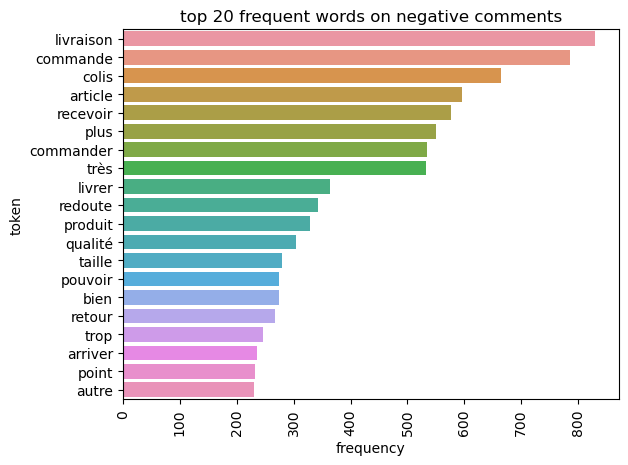

In [24]:
sns.barplot(data=dfd_all.head(20), y="token", x="frequency")
plt.title("top 20 frequent words on all comments")
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=dfd_pos.head(20), y="token", x="frequency")
plt.title("top 20 frequent words on positives comments")
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=dfd_neg.head(20), y="token", x="frequency")
plt.title("top 20 frequent words on negative comments")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Number of token for all comments
len(dfd_all)

7528

In [27]:
#  Save text process into a csv file "data_to_vect"
df.to_csv("data_to_vect.csv")